In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib

In [4]:
model = tf.keras.models.load_model('model/autoencoder-kravchik-v2')

In [5]:
df = pd.read_csv("dataset/swat_attack.csv", delimiter=";", decimal=",")
df.columns = [column.strip() for column in df.columns]
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [6]:
attack_df = df.loc[df['Normal/Attack'] == 'Attack']
attack_indexes = attack_df.index

In [7]:
features_considered = ['FIT101', 'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']

In [8]:
df = df[features_considered]
df.head()

,FIT101,MV101,P101,P102,MV201,P201,P202,P203,P204,P206,...,P401,P402,P403,P404,UV401,P501,P502,P601,P602,P603
0,2.427057,2,2,1,2,1,1,2,1,1,...,1,2,1,1,2,2,1,1,1,1
1,2.446274,2,2,1,2,1,1,2,1,1,...,1,2,1,1,2,2,1,1,1,1
2,2.489191,2,2,1,2,1,1,2,1,1,...,1,2,1,1,2,2,1,1,1,1
3,2.534350,2,2,1,2,1,1,2,1,1,...,1,2,1,1,2,2,1,1,1,1
4,2.569260,2,2,1,2,1,1,2,1,1,...,1,2,1,1,2,2,1,1,1,1


In [9]:
scaler = joblib.load("scaler/uae.gz")
data = scaler.transform(df)

In [12]:
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=24):
    output = []
    for i in range(len(values)//time_steps):
        start_index = time_steps * i
        output.append(values[start_index : start_index + time_steps])

    return np.stack(output)

In [13]:
data_sequence = create_sequences(data, 24)

In [48]:
def multi_step_plot(true_data, prediction):
  num_out = len(true_data)
  
  fig, ax = plt.subplots(26, figsize=(12,50))

  for i in range(26):
    ax[i].plot(np.arange(num_out), true_data, 'bo', label='True Future')
    ax[i].plot(np.arange(num_out), prediction, 'ro', label='Predictions')
    ax[i].set_title(features_considered[i])
  


Predicting index 0 to 23
Predicting index 24 to 47
Predicting index 48 to 71
Predicting index 72 to 95
Predicting index 96 to 119
Predicting index 120 to 143
Predicting index 144 to 167
Predicting index 168 to 191
Predicting index 192 to 215
Predicting index 216 to 239
Predicting index 240 to 263
Predicting index 264 to 287
Predicting index 288 to 311
Predicting index 312 to 335
Predicting index 336 to 359
Predicting index 360 to 383
Predicting index 384 to 407
Predicting index 408 to 431
Predicting index 432 to 455
Predicting index 456 to 479
Predicting index 480 to 503
Predicting index 504 to 527
Predicting index 528 to 551
Predicting index 552 to 575
Predicting index 576 to 599
Predicting index 600 to 623
Predicting index 624 to 647
Predicting index 648 to 671
Predicting index 672 to 695
Predicting index 696 to 719
Predicting index 720 to 743
Predicting index 744 to 767
Predicting index 768 to 791
Predicting index 792 to 815
Predicting index 816 to 839
Predicting index 840 to 863
Pr

C:\Users\fadel\AppData\Local\Temp\ipykernel_12172\764098814.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(26, figsize=(12,50))


21
22
23
Error in callback <function _draw_all_if_interactive at 0x000001E0B66FD670> (for post_execute):


KeyboardInterrupt: 

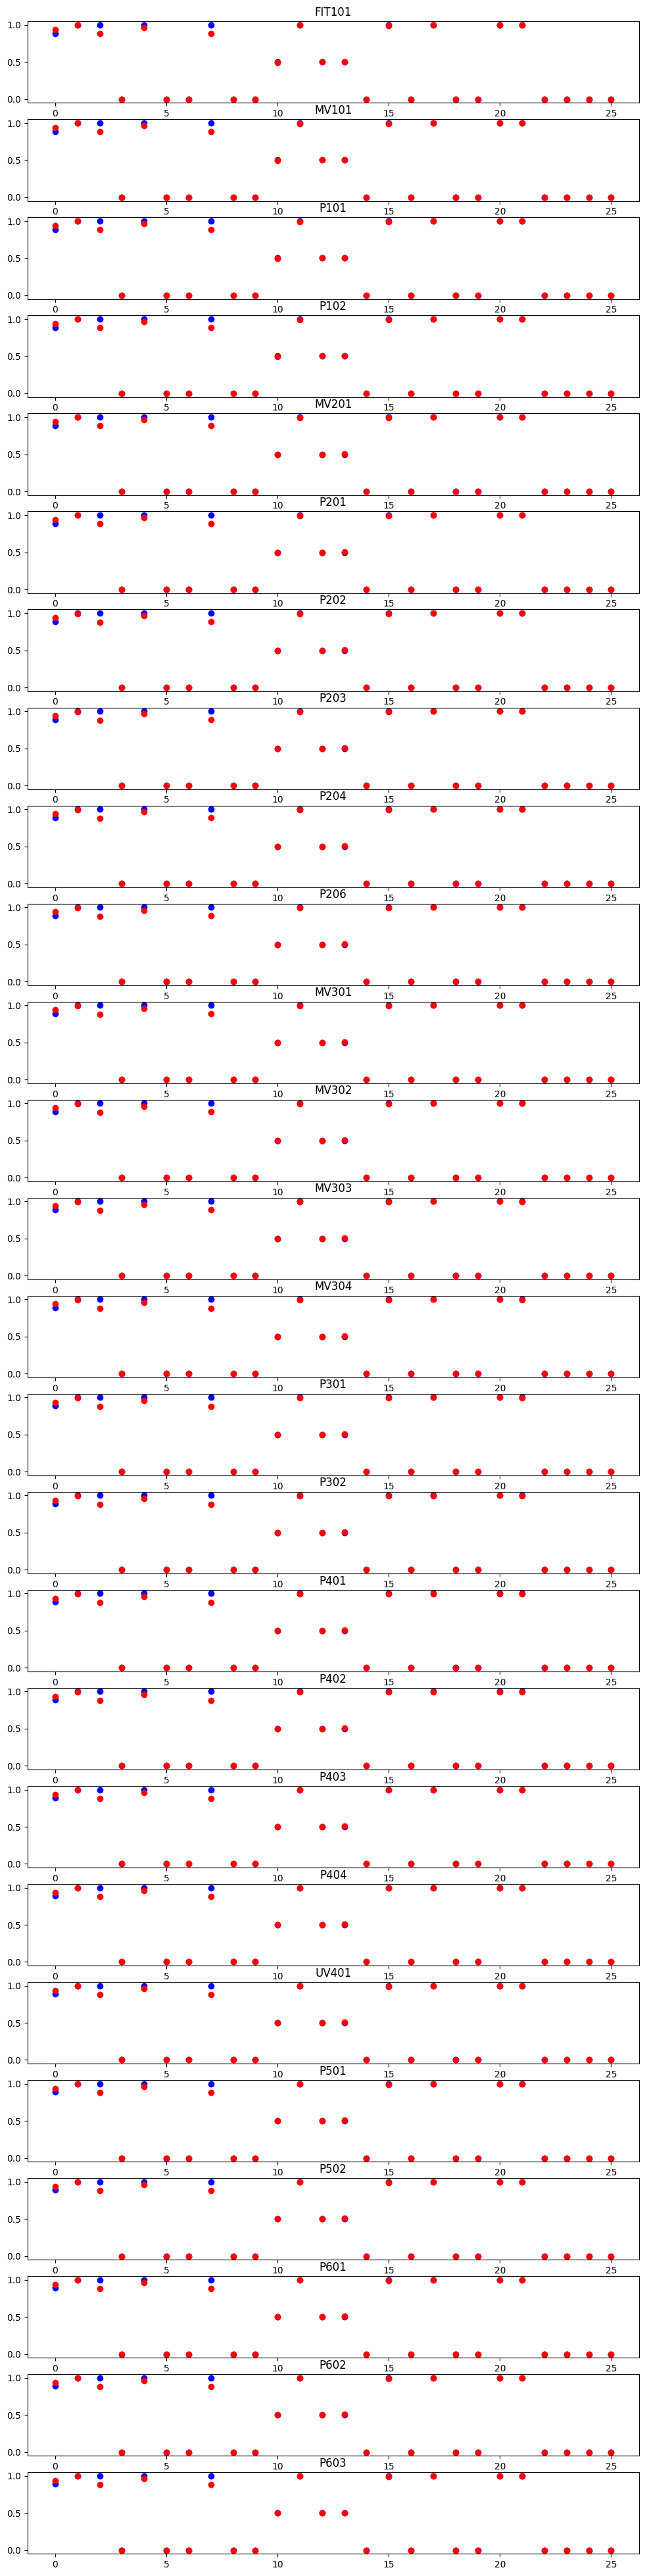

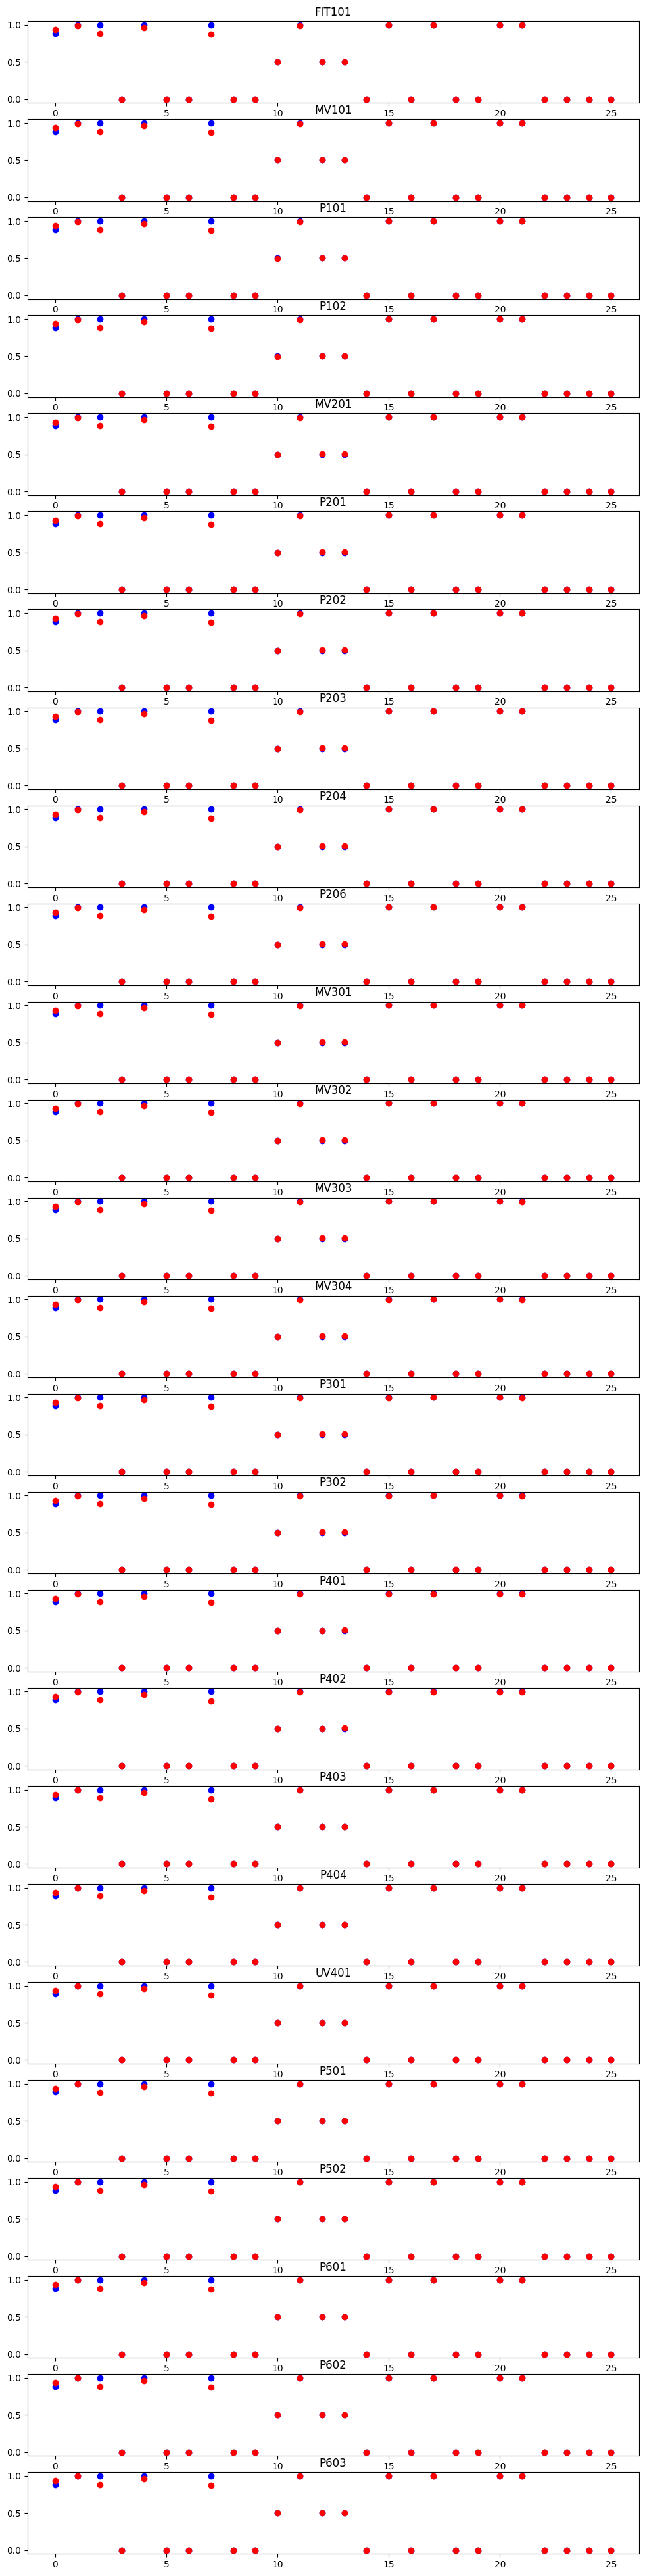

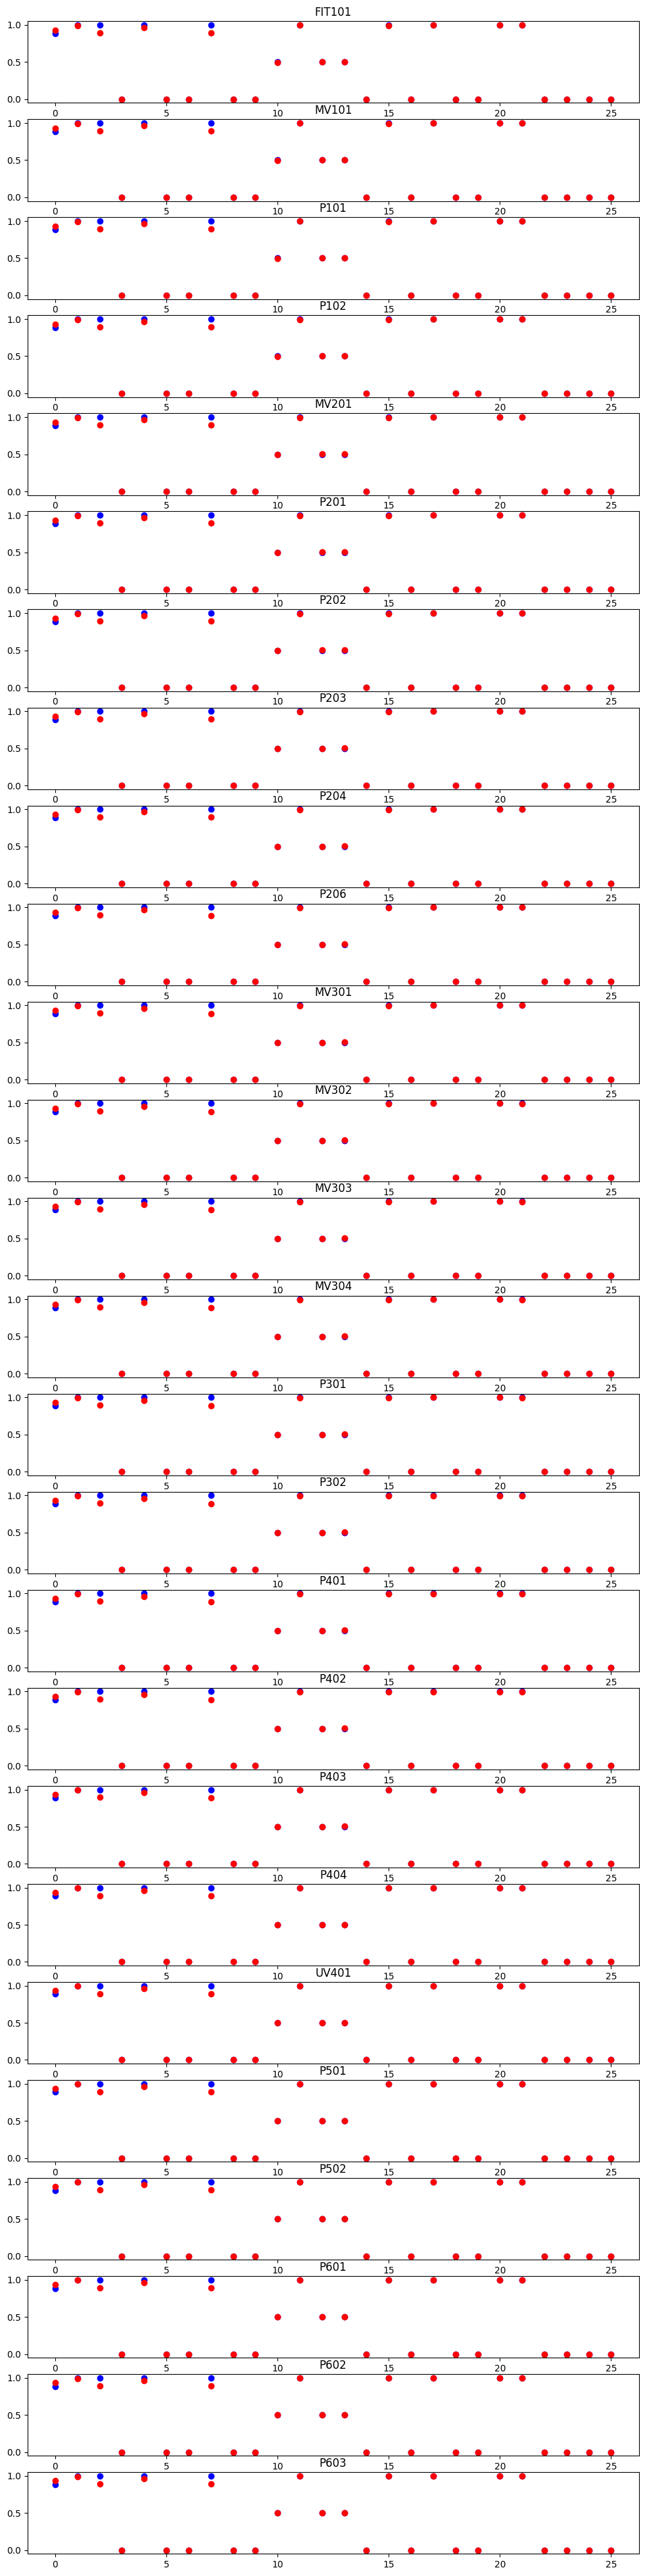

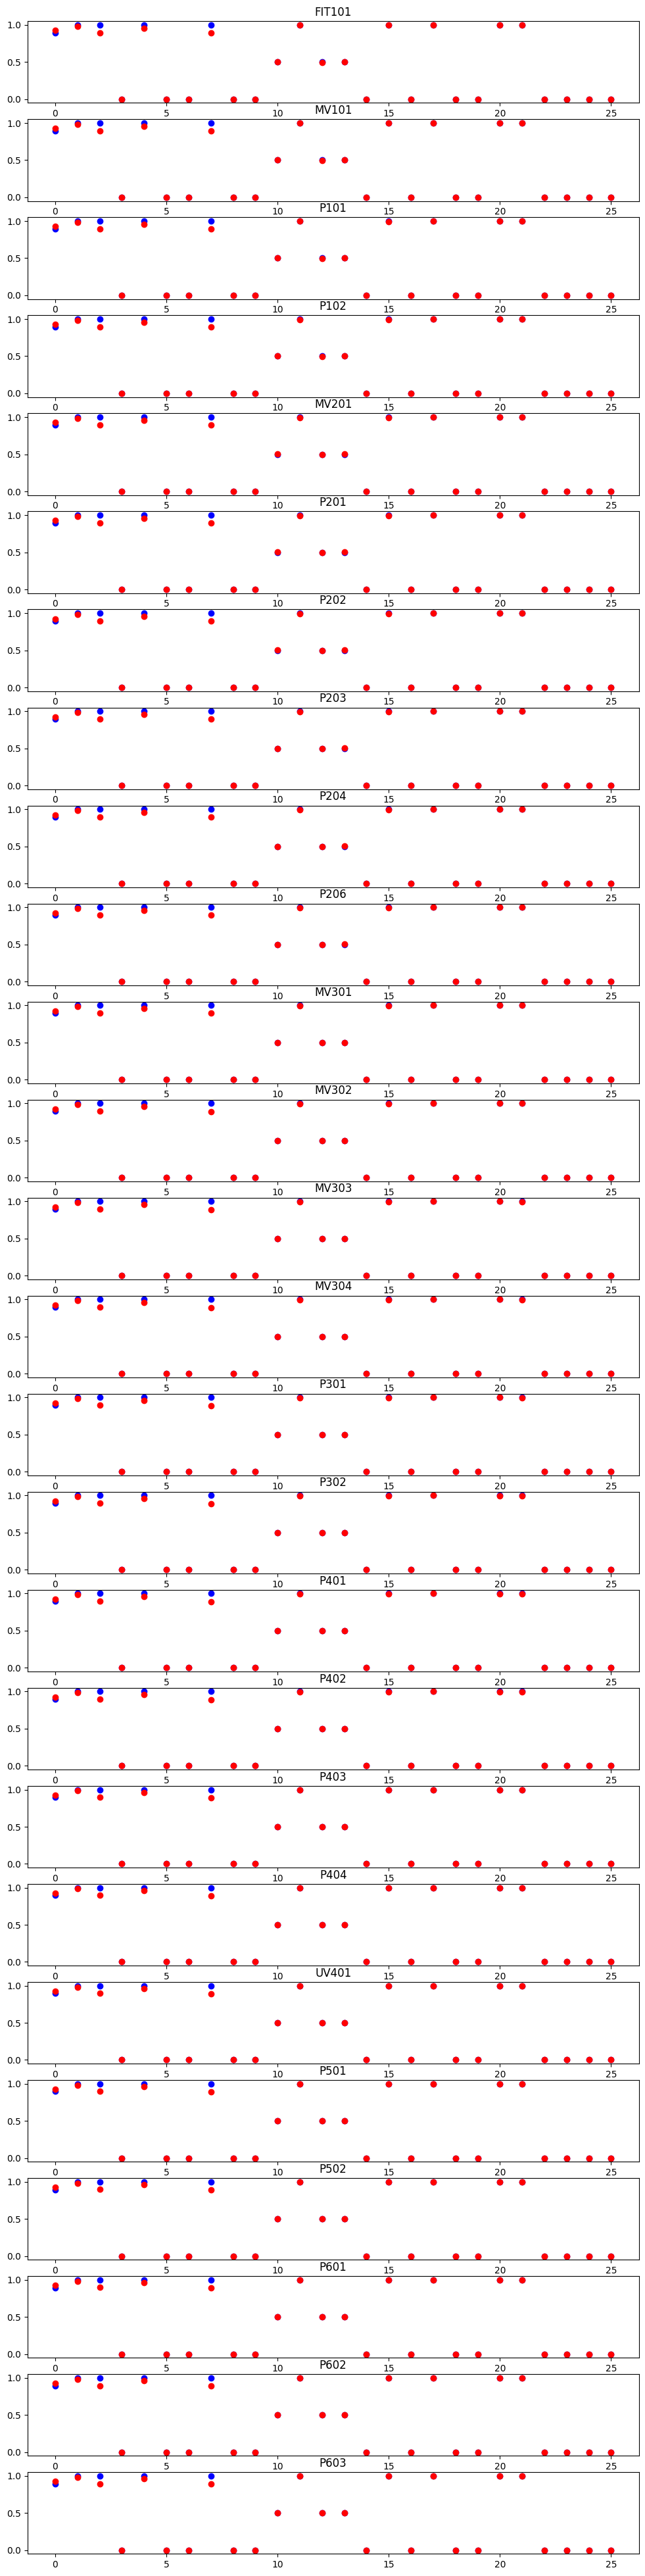

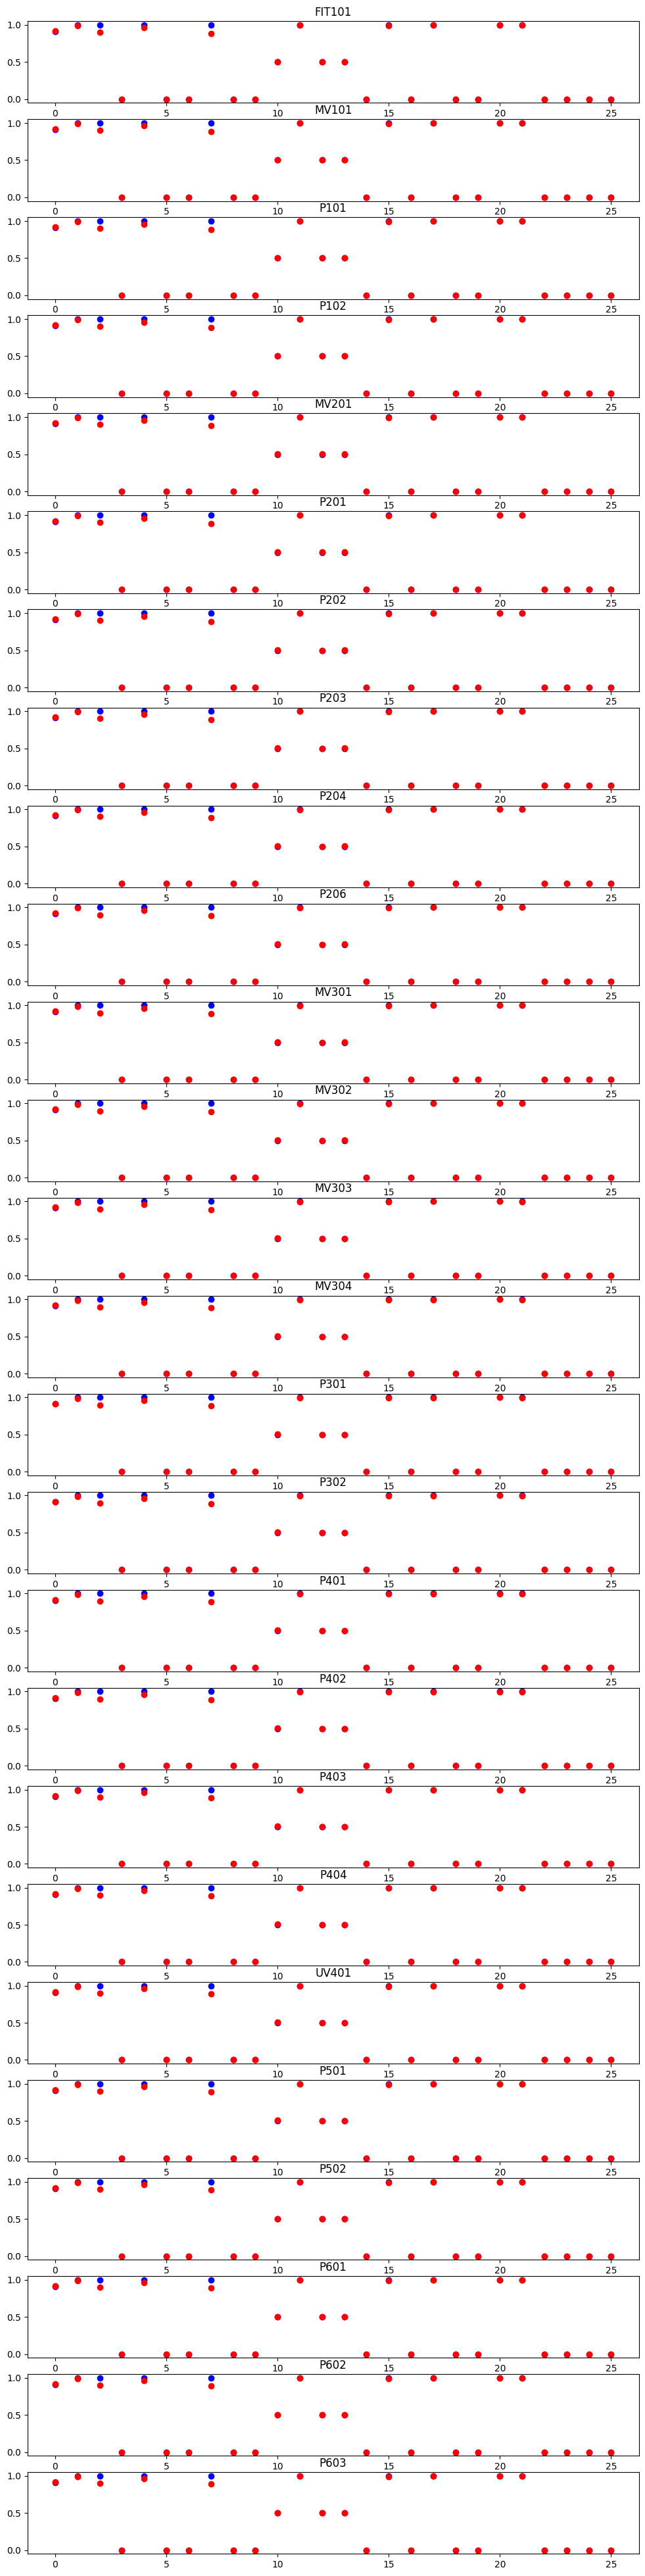

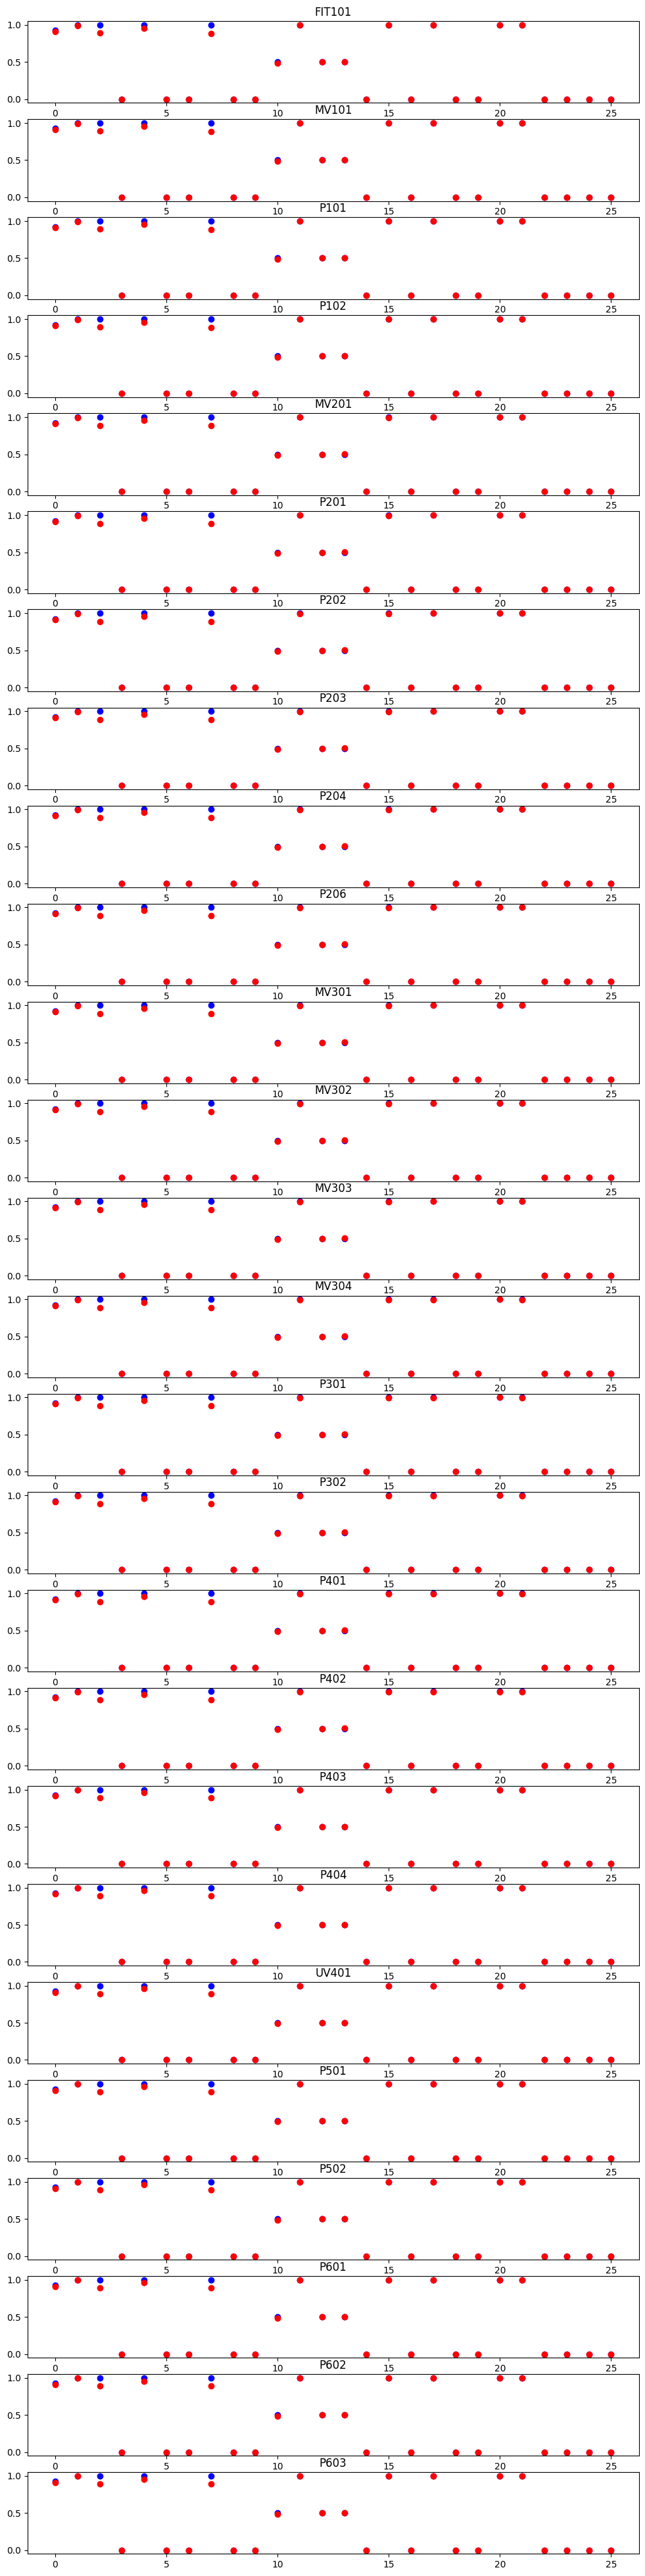

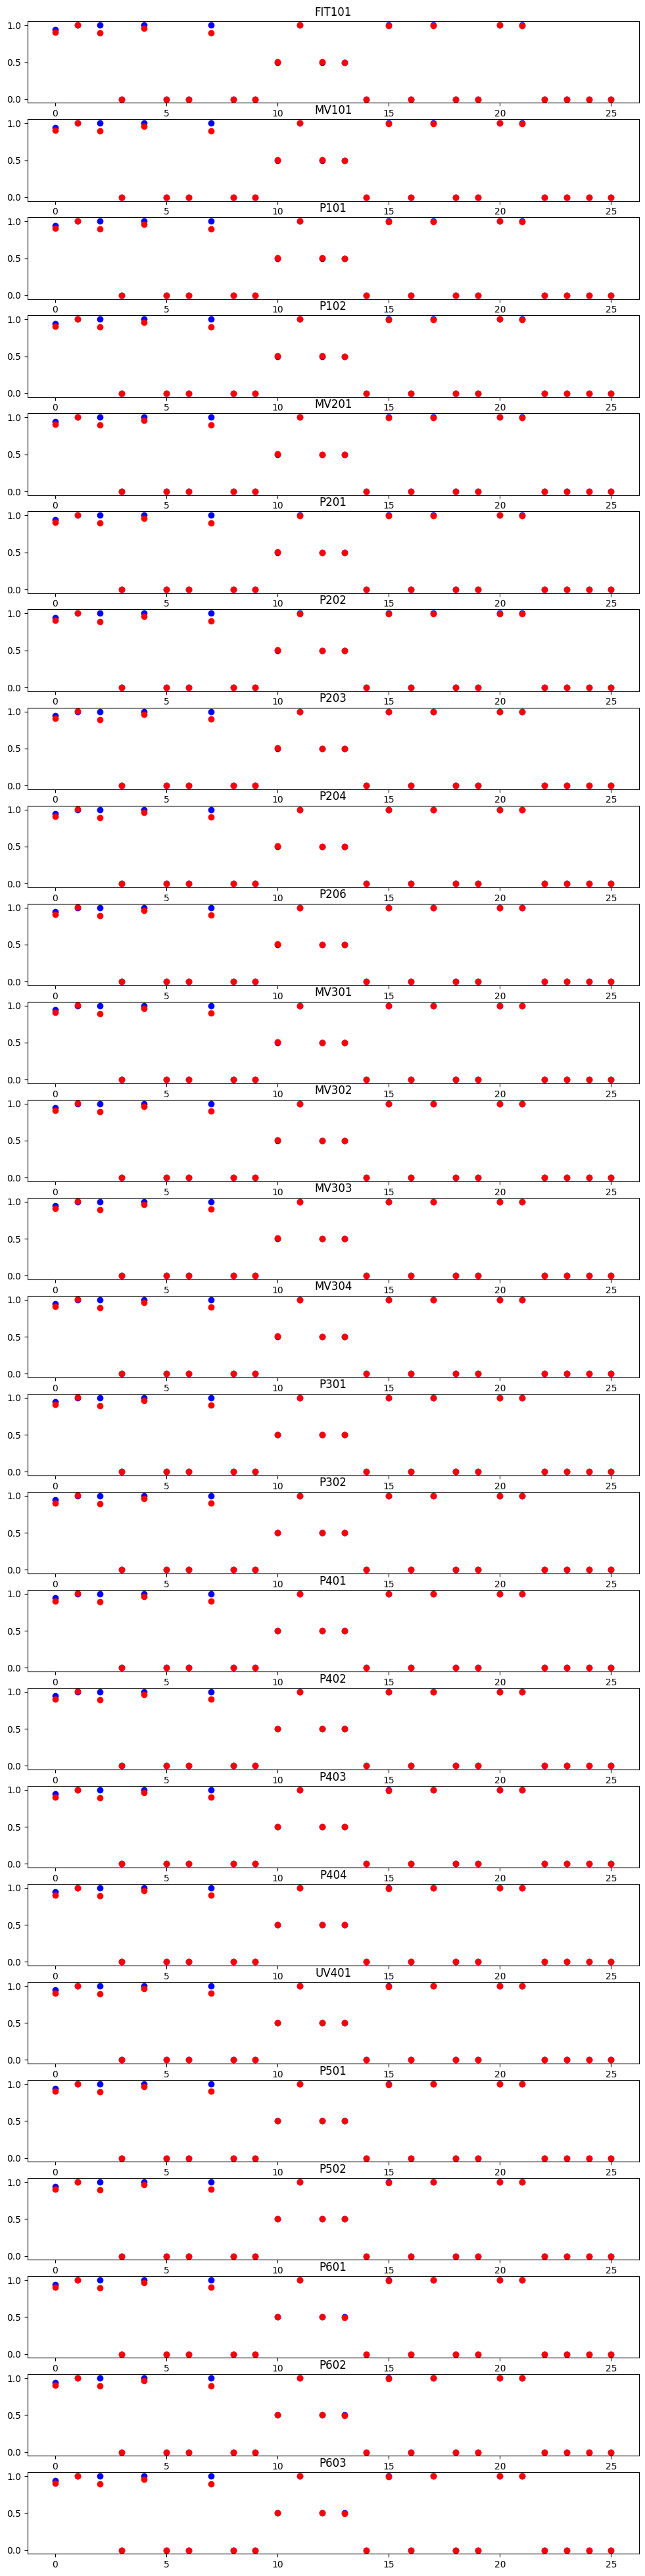

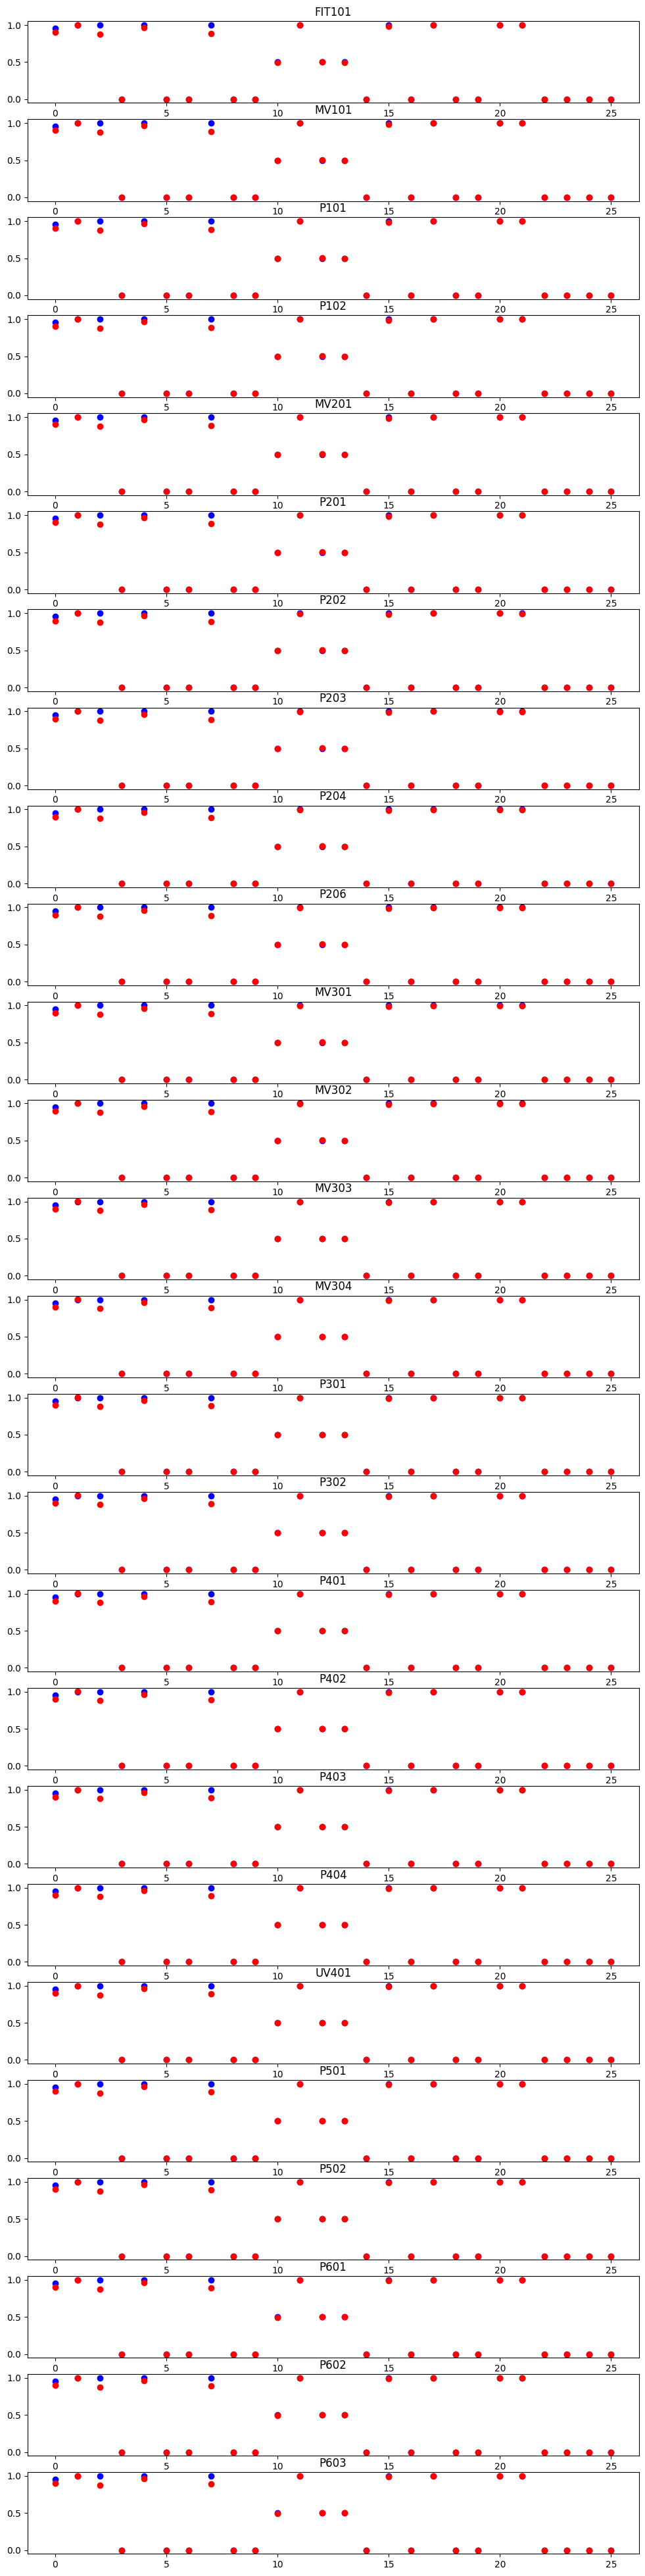

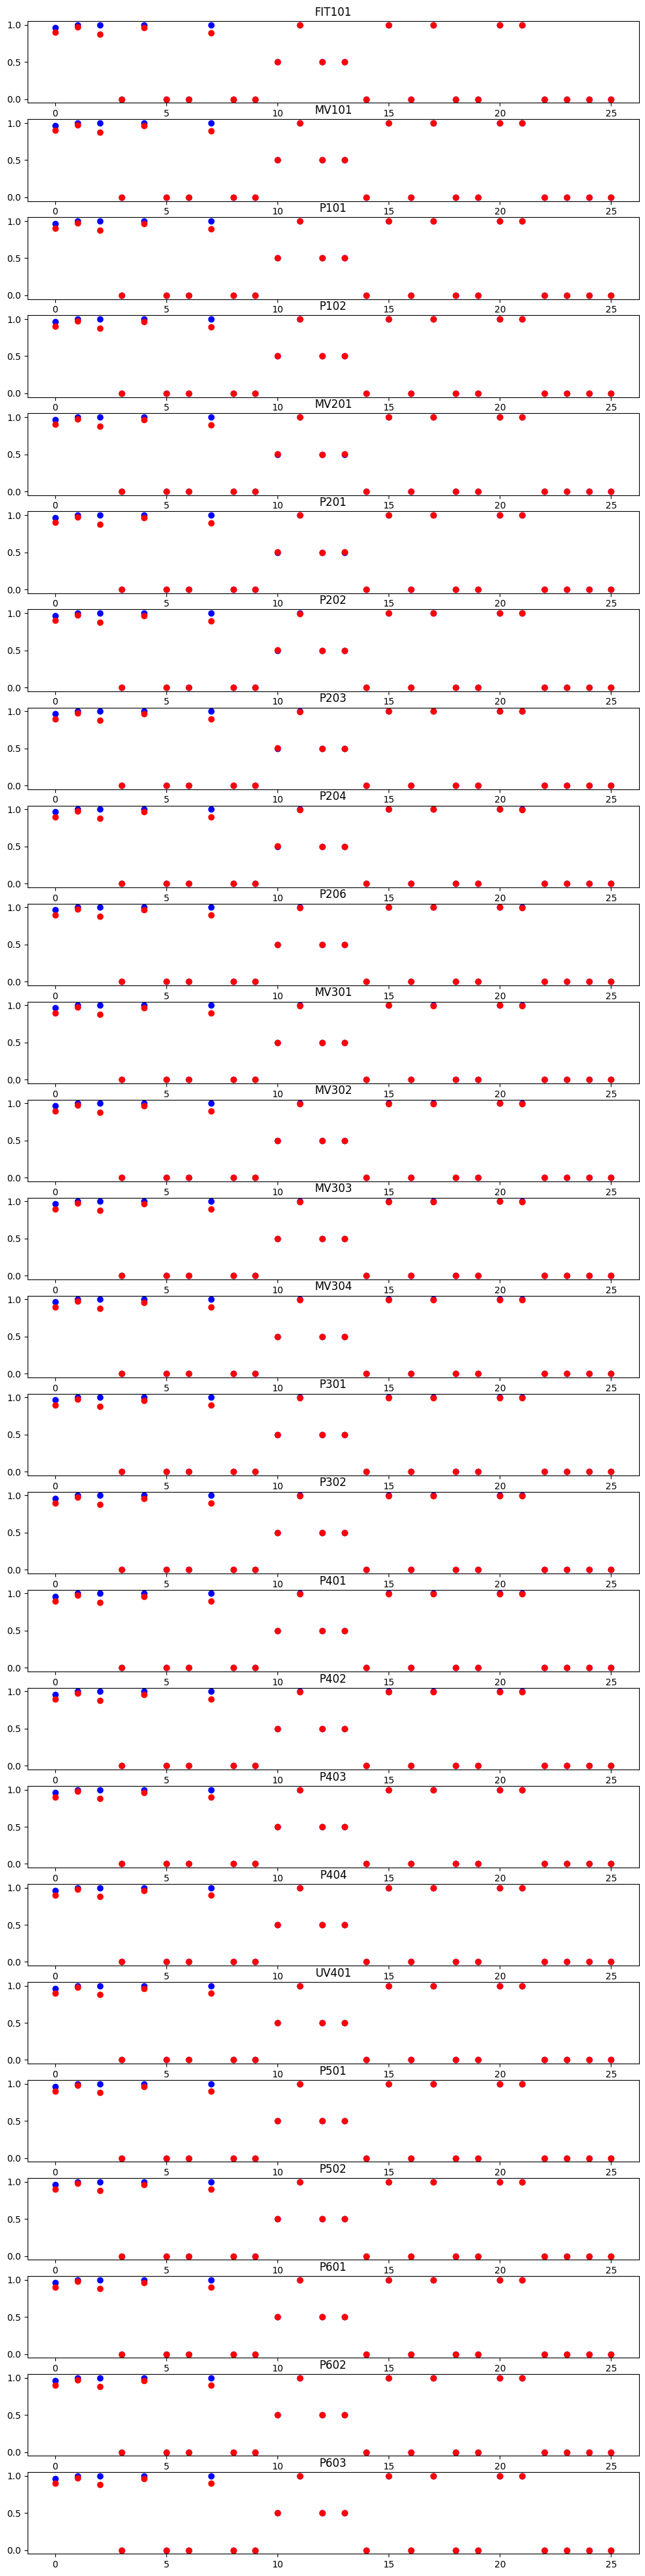

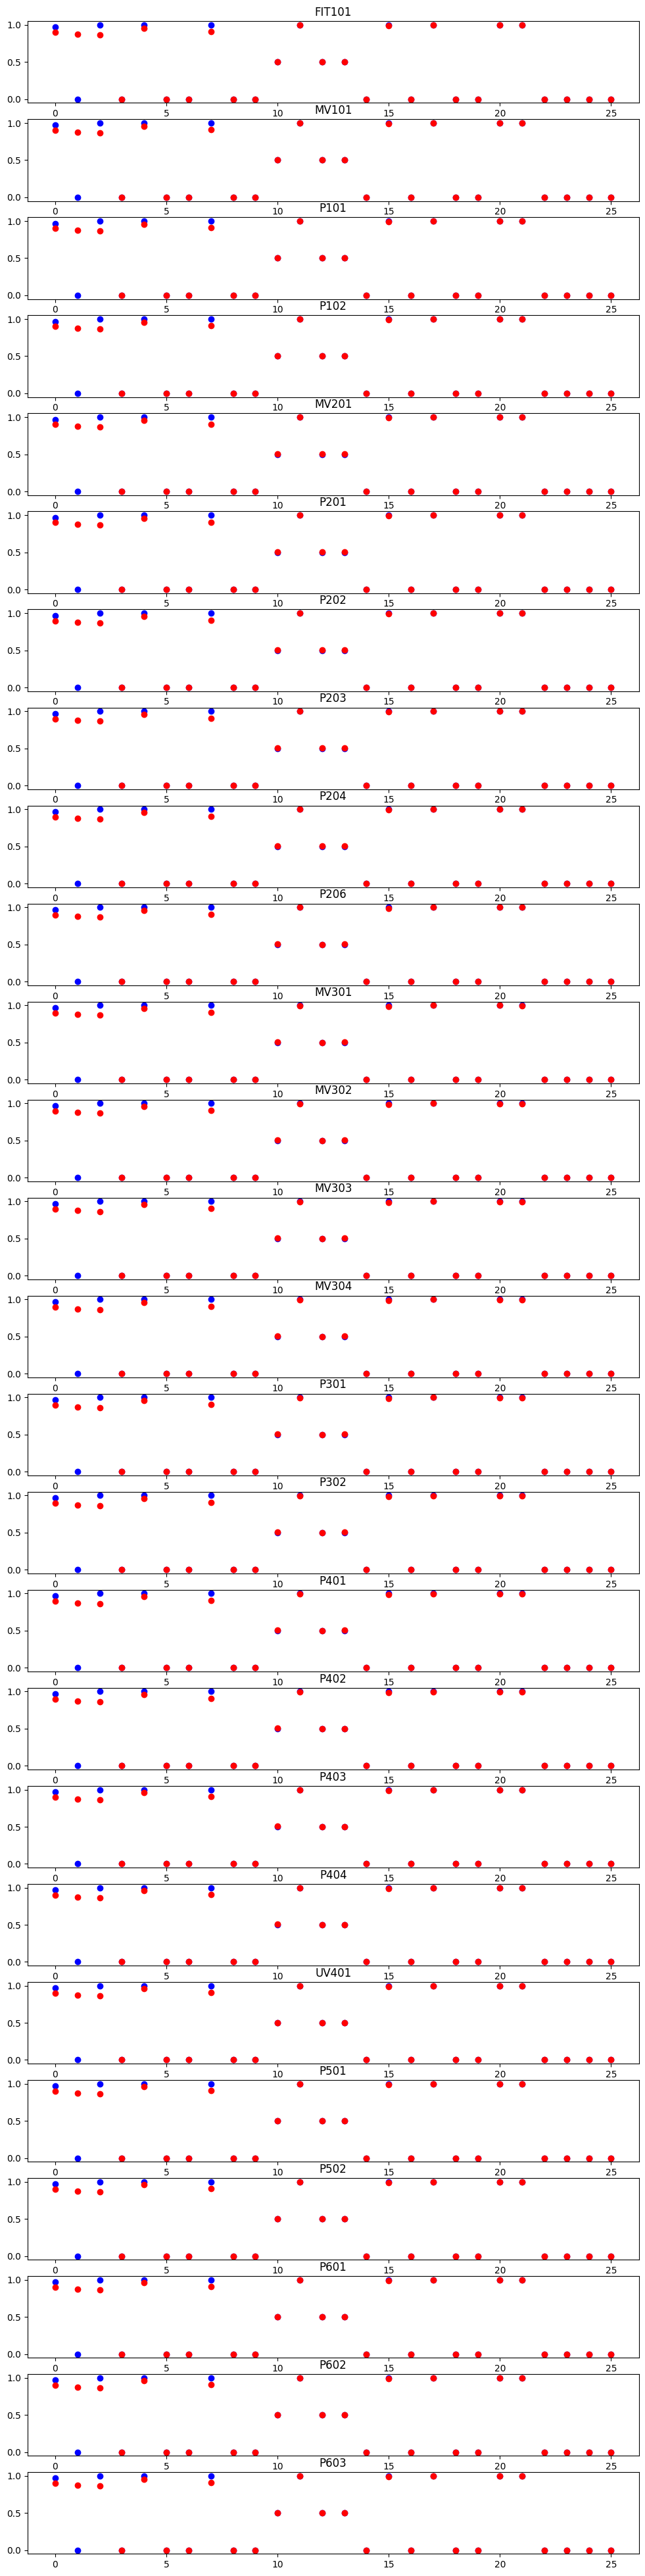

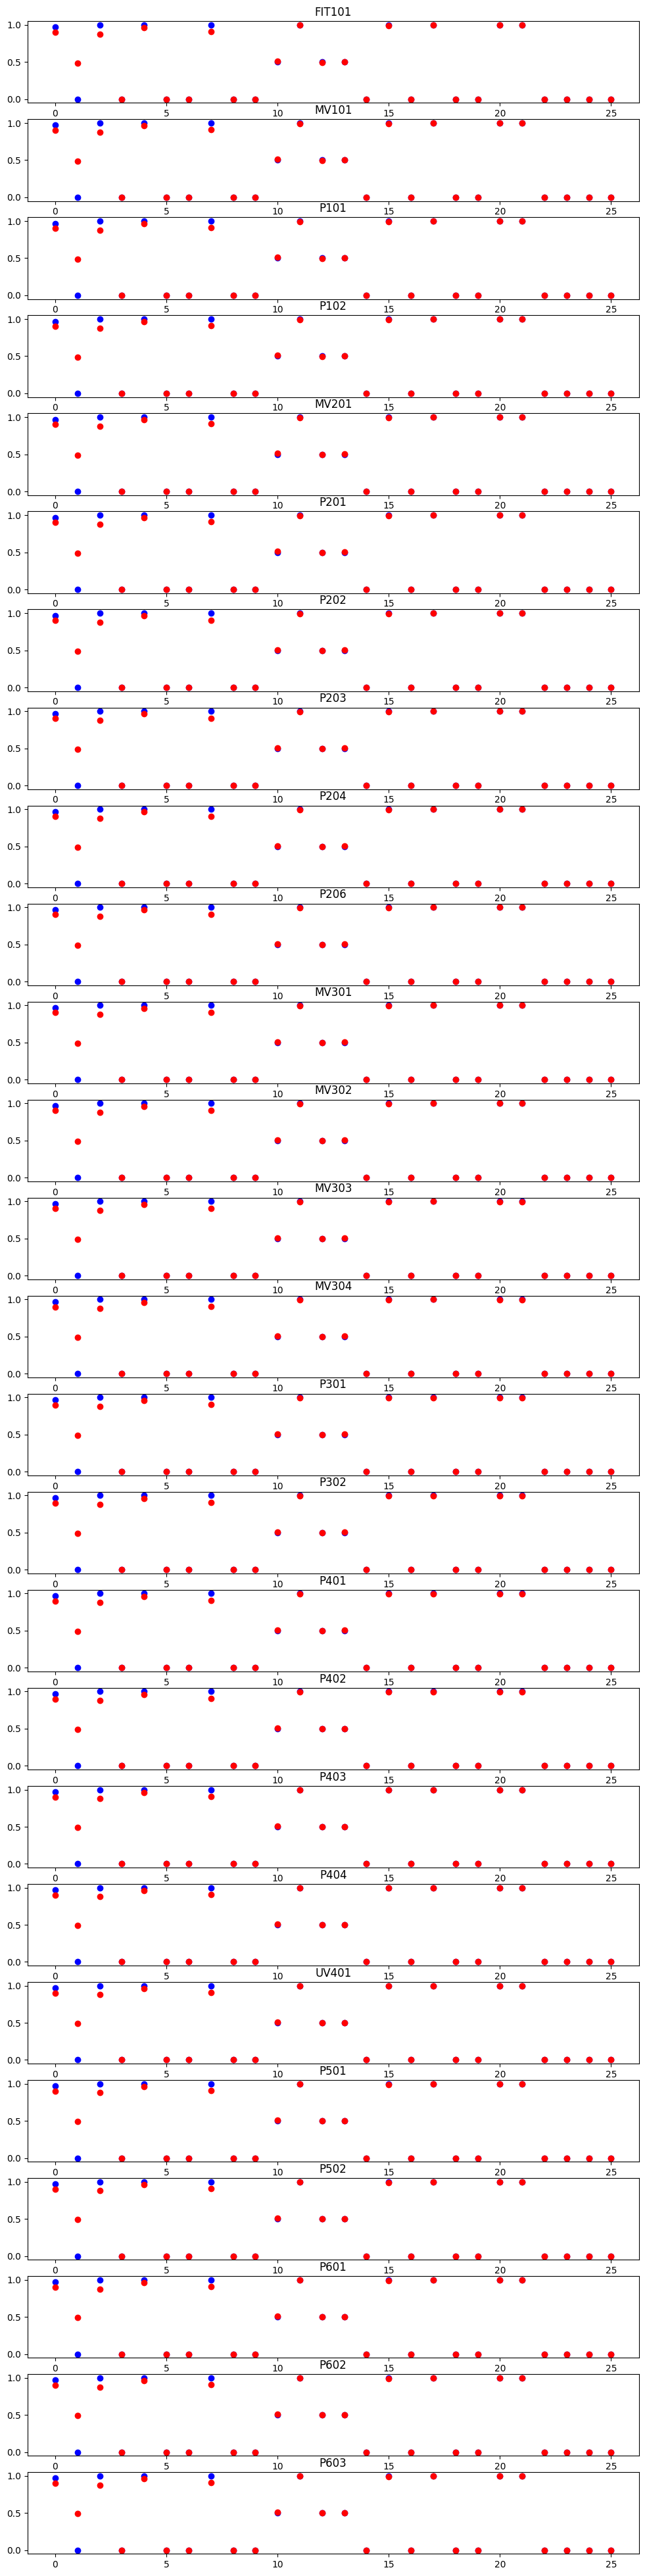

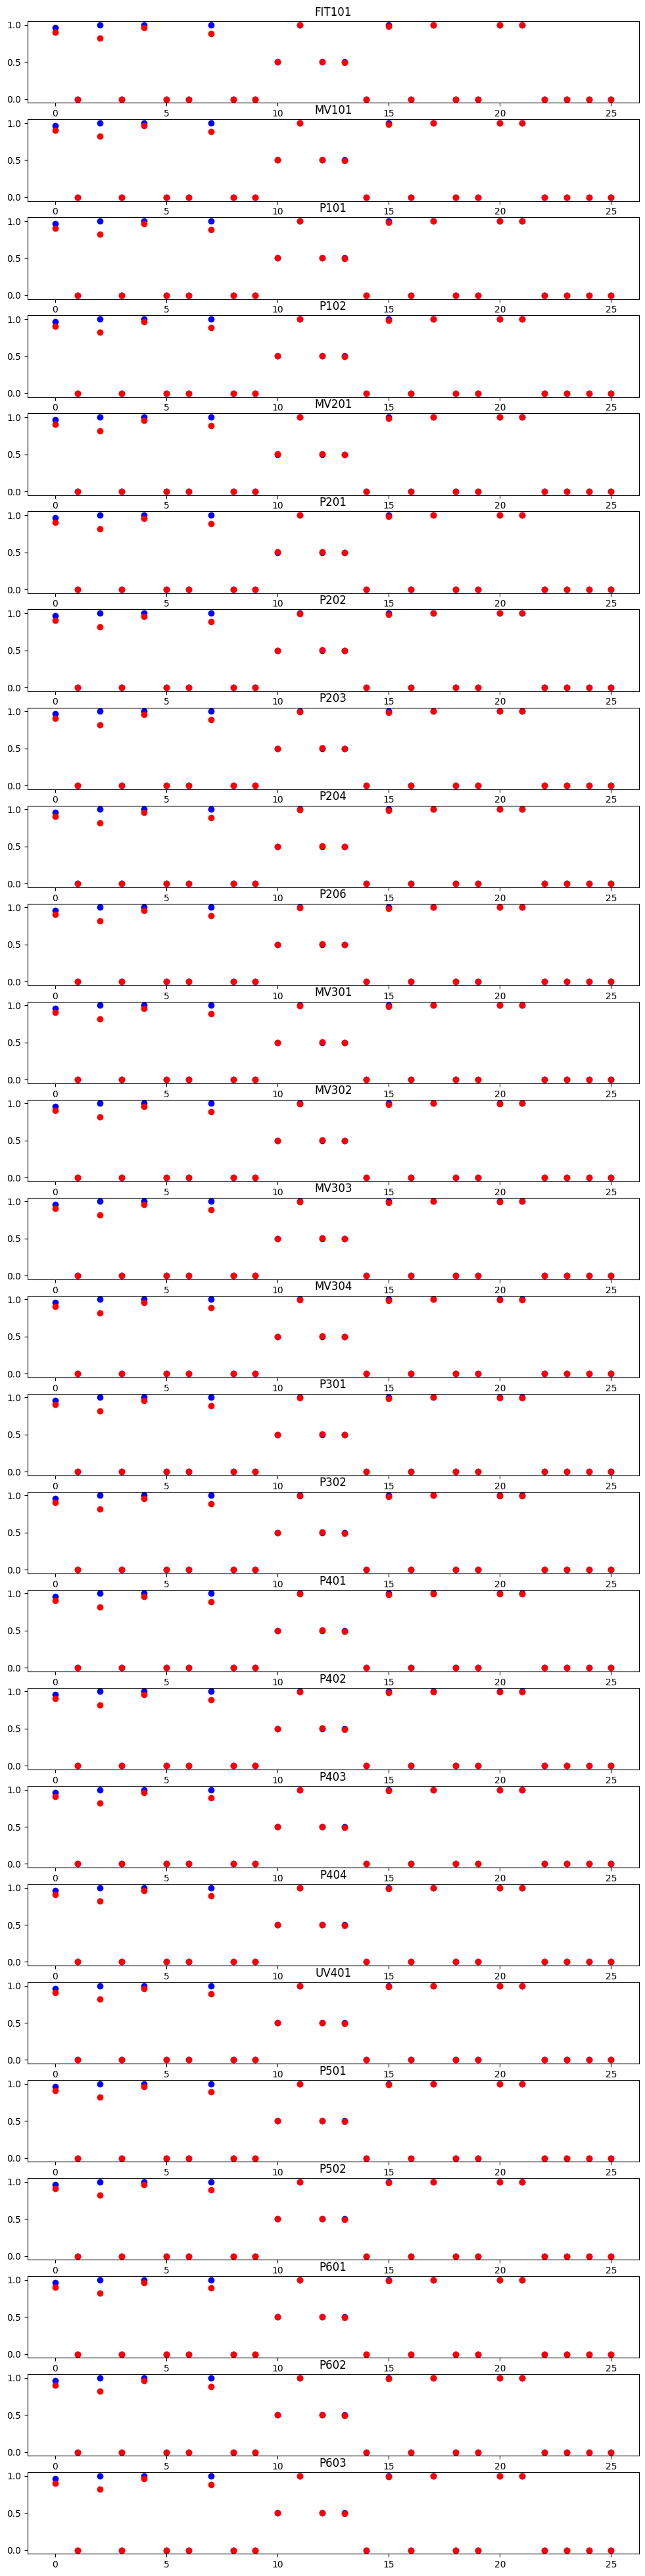

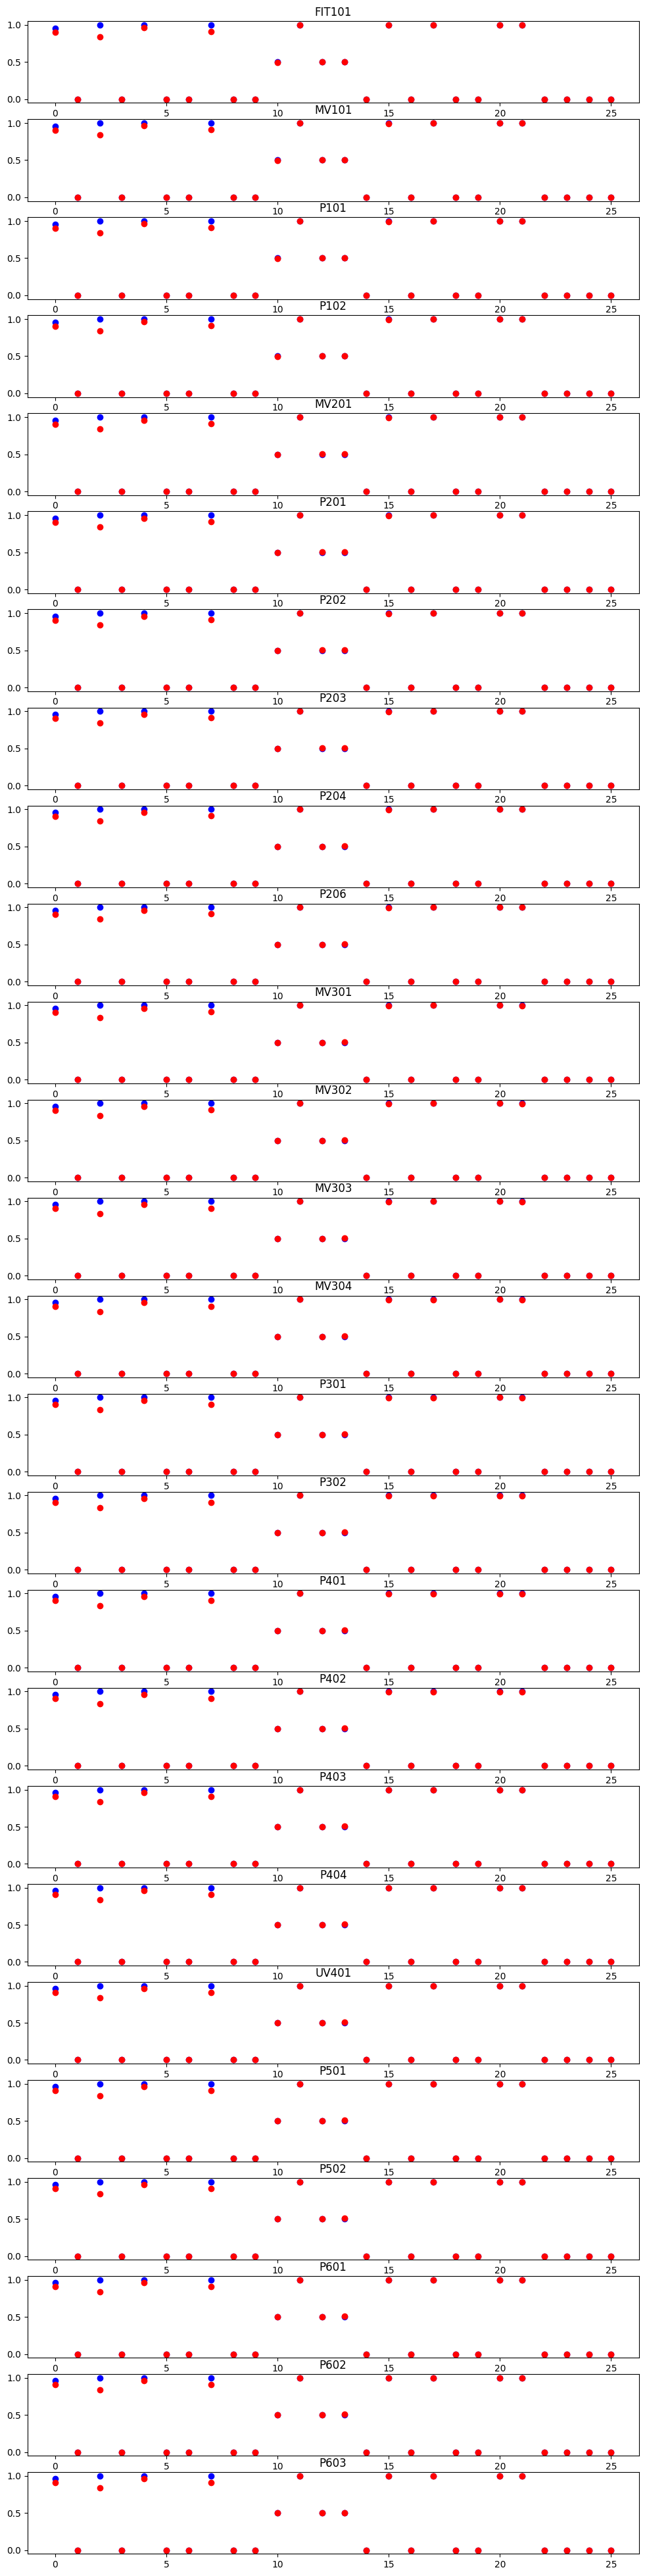

Error in callback <function flush_figures at 0x000001E0BC780C10> (for post_execute):


KeyboardInterrupt: 

In [52]:
attack_list = []
anomaly_list = []
for i in range(len(data_sequence)):
    print(f"Predicting index {i*24} to {i*24 + 24 - 1}")
    checked_index = np.arange(i*24, i*24 + 24, 1).tolist()

    mask = np.in1d(checked_index, attack_indexes)
    if True in mask:
        print("Checking attack")

        prediction = model.predict(data_sequence[i].reshape((1, 24, 26)), verbose=0)

        difference = np.abs(data_sequence[i] - prediction).reshape(24, 26)
        max_val = np.amax(difference, axis=1)

        above_t = max_val[max_val > 0.1]
        
        if (len(above_t) > 1):
            anomaly_list = anomaly_list + checked_index

        if (len(above_t) > 9):
            attack_list =  attack_list + checked_index

print(len(anomaly_list))
print(len(attack_list)/len(attack_indexes) *100)